In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial import Polynomial
from scipy.optimize import curve_fit
import sys
from math import pi
from math import ceil

In [2]:
file = open('../../input/IntPam2010.txt')

In [3]:
lines = file.readlines()

In [4]:
E = []
flux = []
for line in lines[1:]:
    e, f = line.split()
    E.append(float(e))
    flux.append(float(f))

In [5]:
E = np.array(E)
E

array([ 0.082,  0.095,  0.105,  0.11 ,  0.12 ,  0.13 ,  0.15 ,  0.16 ,
        0.17 ,  0.19 ,  0.21 ,  0.22 ,  0.24 ,  0.26 ,  0.29 ,  0.31 ,
        0.34 ,  0.36 ,  0.39 ,  0.43 ,  0.46 ,  0.5  ,  0.54 ,  0.58 ,
        0.62 ,  0.67 ,  0.72 ,  0.77 ,  0.83 ,  0.89 ,  0.96 ,  1.02 ,
        1.09 ,  1.17 ,  1.25 ,  1.34 ,  1.42 ,  1.52 ,  1.62 ,  1.72 ,
        1.83 ,  1.95 ,  2.07 ,  2.2  ,  2.33 ,  2.48 ,  2.62 ,  2.78 ,
        2.94 ,  3.12 ,  3.3  ,  3.49 ,  3.69 ,  4.12 ,  4.59 ,  5.11 ,
        5.68 ,  6.3  ,  6.99 ,  7.74 ,  8.57 ,  9.48 , 10.48 , 11.57 ,
       12.77 , 14.09 , 15.54 , 17.12 , 18.86 , 20.76 , 22.85 , 25.15 ,
       27.66 , 30.42 , 33.44 , 36.75 , 40.39 , 44.37 ])

In [6]:
flux = np.array(flux)
flux

array([1.334967e+03, 1.382404e+03, 1.462203e+03, 1.682318e+03,
       1.816430e+03, 2.040187e+03, 2.343113e+03, 2.185130e+03,
       2.302665e+03, 2.484283e+03, 2.469407e+03, 2.404784e+03,
       2.452868e+03, 2.587382e+03, 2.660621e+03, 2.614418e+03,
       2.600506e+03, 2.549032e+03, 2.443305e+03, 2.393106e+03,
       2.328825e+03, 2.201917e+03, 2.232442e+03, 2.110885e+03,
       2.013549e+03, 1.843377e+03, 1.802870e+03, 1.749204e+03,
       1.570682e+03, 1.500112e+03, 1.409334e+03, 1.335055e+03,
       1.194435e+03, 1.130494e+03, 1.043878e+03, 9.385920e+02,
       8.958740e+02, 8.188010e+02, 7.418160e+02, 6.732810e+02,
       6.318630e+02, 5.751420e+02, 5.193750e+02, 4.682520e+02,
       4.420580e+02, 3.828320e+02, 3.463940e+02, 3.172090e+02,
       2.952530e+02, 2.623020e+02, 2.385990e+02, 2.045080e+02,
       1.781140e+02, 1.505640e+02, 1.177860e+02, 9.476300e+01,
       7.483900e+01, 5.947300e+01, 4.596200e+01, 3.706400e+01,
       2.875300e+01, 2.269700e+01, 1.837600e+01, 1.3985

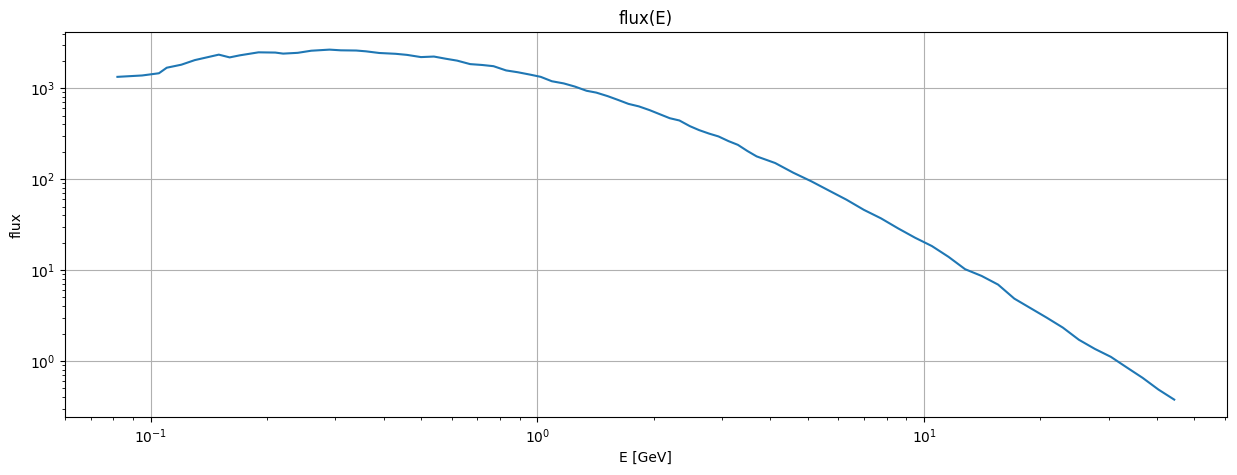

In [7]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(E, flux)
plt.semilogy()
plt.semilogx()
plt.grid(True)
ax.set_title('flux(E)')
ax.set_ylabel('flux')
ax.set_xlabel('E [GeV]');

In [8]:
def mapping1(values_x, a, b, c):
    return a * values_x**2 + b * values_x + c

In [9]:
args, _ = curve_fit(mapping1, E, flux)
a, b, c = args
y_fit1 = a * E**2 + b * E + c

In [10]:
def mapping2(values_x, a, b, c):
    return a * values_x**3 + b * values_x + c

In [11]:
args, _ = curve_fit(mapping2, E, flux)
a, b, c = args
y_fit2 = a * E**3 + b * E + c

In [12]:
def mapping3(values_x, a, b, c):
    return a * values_x**3 + b * values_x**2 + c

In [13]:
args, _ = curve_fit(mapping3, E, flux)
a, b, c = args
y_fit3 = a * E**3 + b * E**2 + c

In [14]:
def mapping4(values_x, a, b, c):
    return a * np.exp(b * values_x) + c

In [15]:
args, _ = curve_fit(mapping4, E, flux)
a, b, c = args
y_fit4 = a * np.exp(b * E) + c

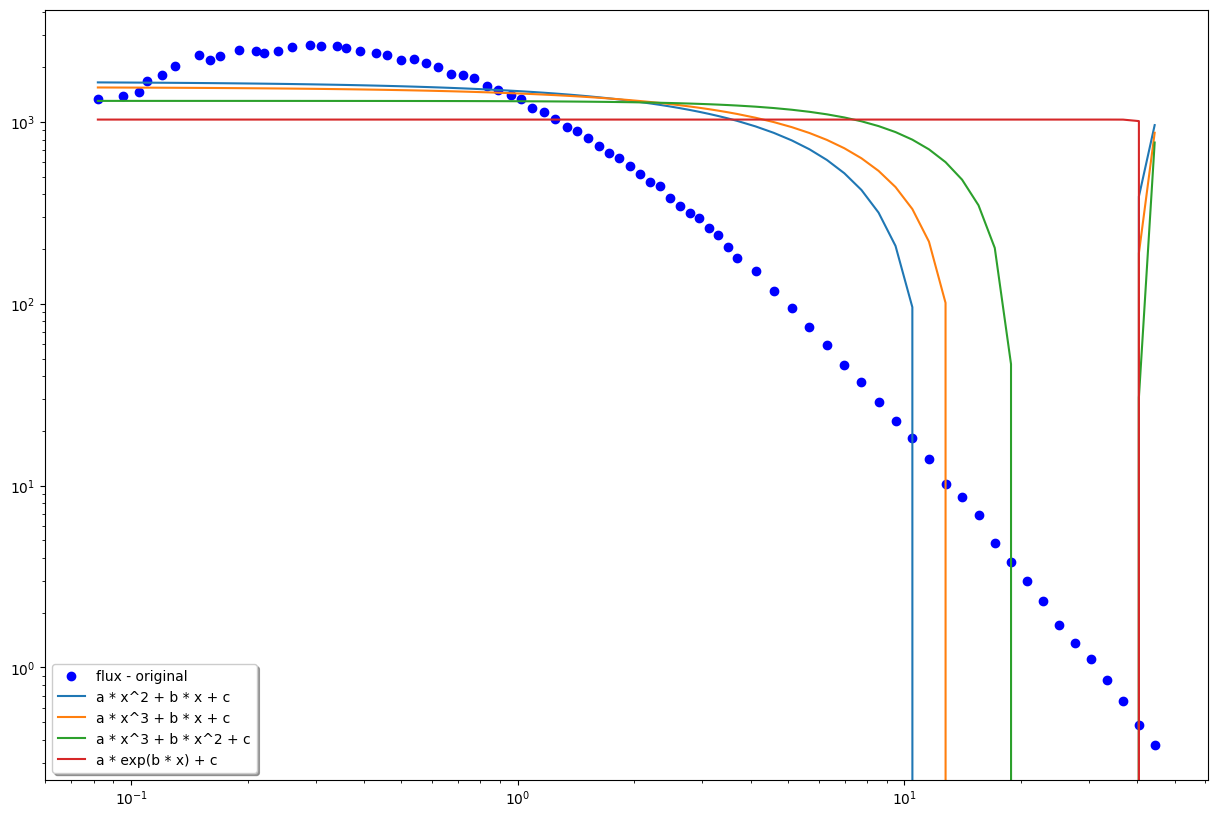

In [16]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(E, flux, 'bo', label='flux - original')
plt.plot(E, y_fit1, label='a * x^2 + b * x + c')
plt.plot(E, y_fit2, label='a * x^3 + b * x + c')
plt.plot(E, y_fit3, label='a * x^3 + b * x^2 + c')
plt.plot(E, y_fit4, label='a * exp(b * x) + c')
plt.semilogx()
plt.semilogy()
plt.legend(loc='best', fancybox=True, shadow=True);

In [17]:
degrees = (1, 2, 3, 4, 5, 10)

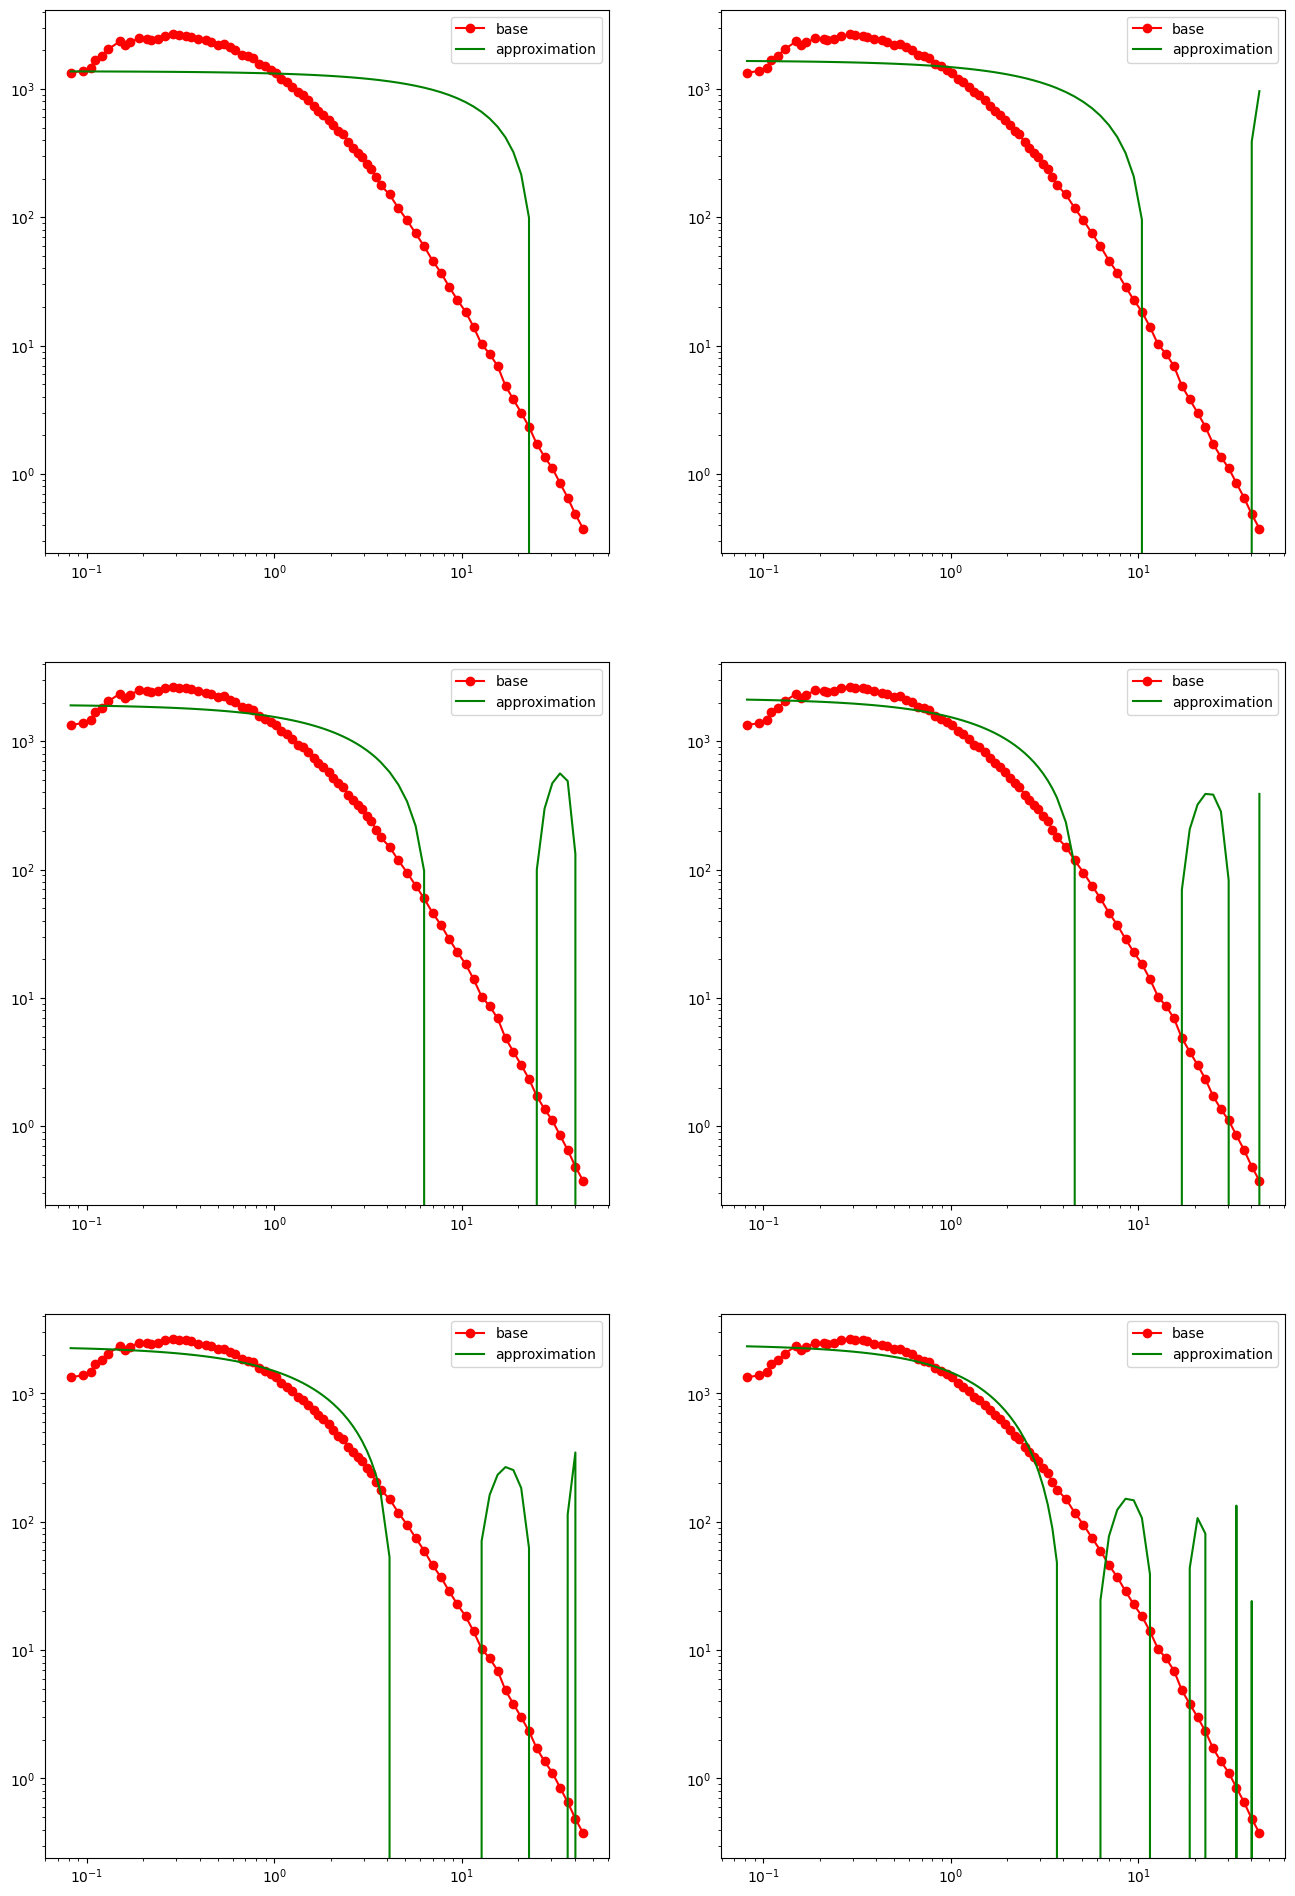

In [18]:
fig, axs = plt.subplots(figsize=(16, 24), nrows=3, ncols=2)
for ax, degree in zip(axs.flatten(), degrees):
    approximation = Polynomial.fit(E, flux, degree)
    ax.plot(E, flux, marker='o', color='red', label='base')
    ax.plot(E, approximation(E), color='green', label='approximation')
    ax.semilogx()
    ax.semilogy()
    ax.legend()

In [19]:
def lcheck(index, params):
    seq, x = params
    return seq[index][0] >= x

def lbinsearch(l, r, ckeck, checkparams):
    while l < r:
        m = (l + r) // 2
        if ckeck(m, checkparams):
            r = m
        else:
            l = m + 1
    return l

In [20]:
def rcheck(index, params):
    seq, x = params
    return seq[index][0] <= x

def rbinsearch(l, r, check, checkparams):
    while l < r:
        m = (l + r + 1) // 2
        if check(m, checkparams):
            l = m
        else:
            r = m - 1
    return r

In [21]:
flux_e = []

for i in range(len(E)):
    flux_e.append((E[i], flux[i]))

In [22]:
flux_e[0]

(0.082, 1334.967)

In [23]:
def func(x):
    lindex = lbinsearch(0, len(flux_e) - 1, lcheck, (flux_e, x))
    rindex = rbinsearch(0, len(flux_e) - 1, rcheck, (flux_e, x))
    
    y1 = flux_e[lindex][1]
    y2 = flux_e[rindex][1]
    x1 = flux_e[lindex][0]
    x2 = flux_e[rindex][0]
    if x1 == x2:
        return y1
    return y1 + (y2 - y1) * (x - x1) / (x2 - x1)

In [24]:
E[-1]

44.37

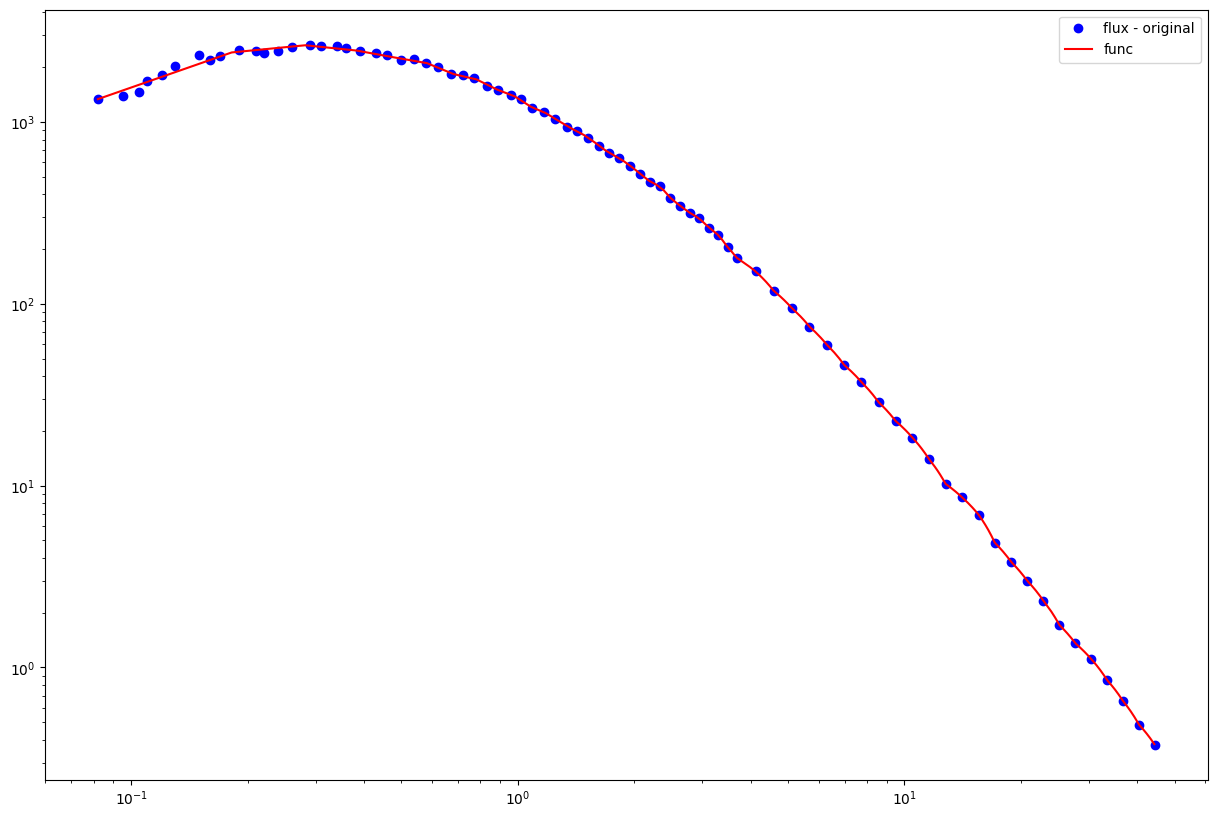

In [25]:
func_y = []
e_arr = []
ei = E[0]
while ei < E[-1]:
    func_y.append(func(ei))
    e_arr.append(ei)
    ei += 0.1

plt.subplots(figsize=(15, 10))
plt.plot(E, flux, 'bo', label='flux - original')
plt.plot(e_arr, func_y, color='red', label='func')
plt.semilogx()
plt.semilogy()
plt.legend();

In [26]:
def func_old(energy):
    index = lbinsearch(0, len(flux_e) - 1, lcheck, (flux_e, energy))
    return flux_e[index][1]

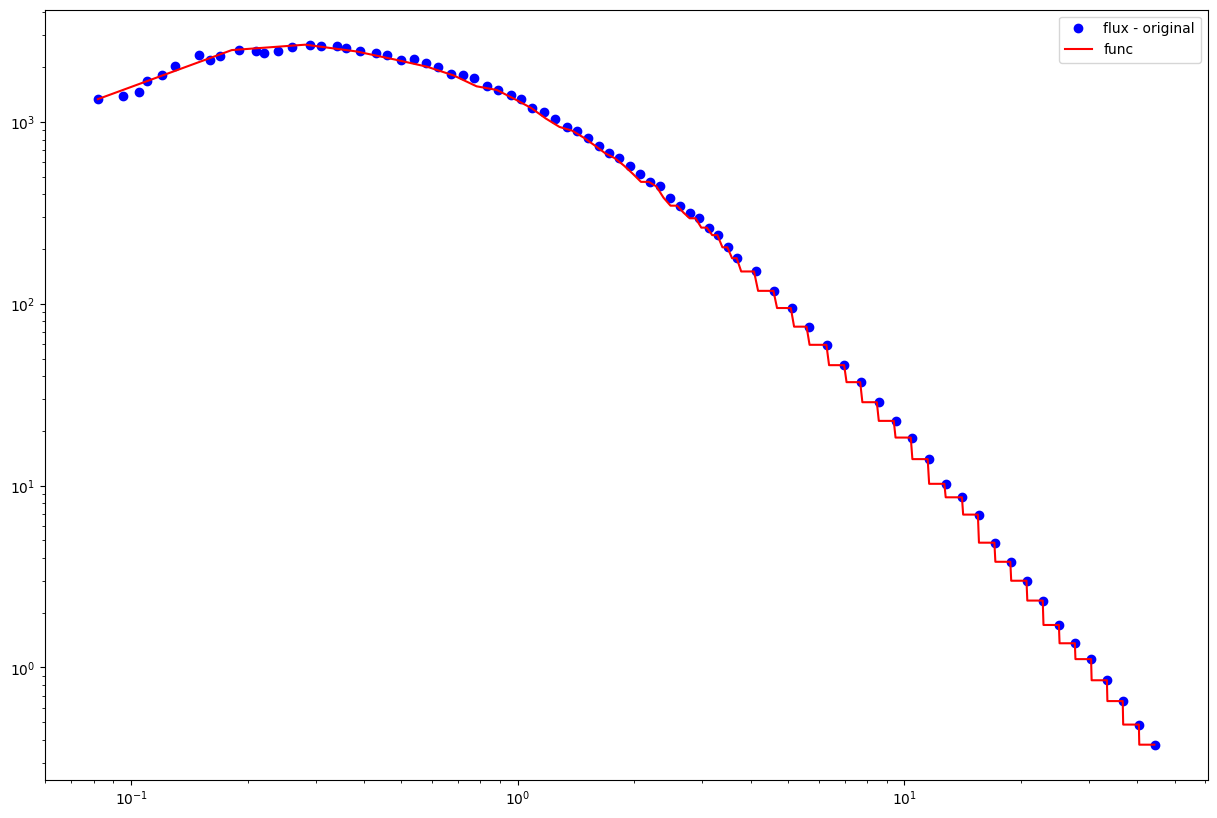

In [27]:
func_y = []
e_arr = []
ei = E[0]
while ei < E[-1]:
    func_y.append(func_old(ei))
    e_arr.append(ei)
    ei += 0.1

plt.subplots(figsize=(15, 10))
plt.plot(E, flux, 'bo', label='flux - original')
plt.plot(e_arr, func_y, color='red', label='func')
plt.semilogx()
plt.semilogy()
plt.legend();

In [28]:
n = 100000
de = (E[-1] - E[0]) / n
ei = E[0]
integral = 0

for _ in range(n):
    integral += func(ei) * de
    ei += de

print('integral =', integral)

integral = 3804.1543252056713


In [29]:
n = 100000
de = (E[-1] - E[0]) / n
ei = E[0]
old_integral = 0

for _ in range(n):
    old_integral += func_old(ei) * de
    ei += de

print('old_integral =', old_integral)

old_integral = 3658.9911568395078


In [30]:
integral, old_integral

(3804.1543252056713, 3658.9911568395078)

In [31]:
norm = 8. * (pi * 1.25)**2
norm

123.37005501361698

In [32]:
norm * integral

469318.7283809126

In [33]:
print(norm * integral * 100 / 10**6)

46.93187283809126


In [34]:
8. * (pi * 0.94)**2 * 3804. * 5

1326954.257409797

In [35]:
8. * (pi * 0.94)**2 * integral * 5

1327008.0908715979

## Расчет числа событий внутри произвольного интервла энергии

In [78]:
def integral_a_b(a=0, b=1., n=100000):
    dE = (b - a) / n
    res = 0.
    ei = a
    
    for _ in range(n):
        res += func(ei) * dE
        ei += dE
    
    return res

In [79]:
integral - integral_a_b(E[0], E[-1])

0.0

In [58]:
print(E[0], E[-1])

0.082 44.37


In [80]:
ni_list = []

ni_list.append(integral_a_b(E[0], 1.))

for ei in range(1, 44):
    ni_list.append(integral_a_b(float(ei), float(ei + 1)))

ni_list.append(integral_a_b(44., E[-1]))

In [85]:
integral_a_b(E[0], E[-1]) - sum(ni_list)

0.2881328947150905

Разница обуслевена тем, что в расчетах различная точность вычисления. Ниже проверим это. 

Для простоты будем брать онтервал от 0 до 40 по энергии. Подберем точность так, что бы она была одинаковая в обоих вычислениях. 

При расчете интеграла через функцию в бине на 1 GeV, при общем числе итерации при расчете интеграла n, на каждый 1 GeV приходится n / 40 интераций.  

In [98]:
100000 / 40

2500.0

In [96]:
ni_list = []

for ei in range(0, 40):
    ni_list.append(integral_a_b(float(ei), float(ei + 1), n=2500))

In [101]:
round(integral_a_b(0, 40) - sum(ni_list), 9)

0.0

С точностью до 9 знаков - мы правы!

In [117]:
ni_list = []

ni_list.append(integral_a_b(E[0], 1.))

for ei in range(1, 44):
    ni_list.append(integral_a_b(float(ei), float(ei + 1)))

ni_list.append(integral_a_b(44., E[-1]))

In [159]:
year_seconds = 60 * 60 * 24 * 365
year_seconds

31536000

In [172]:
ni_list_normed = [ni * norm * year_seconds for ni in ni_list]

In [176]:
sum(ni_list_normed)

14799314408940.73

In [178]:
coff = 10**6 / sum(ni_list_normed)
coff

6.757069769366267e-08

In [174]:
len(ni_list_normed)

45

In [179]:
df = pd.DataFrame(
    {'E0': range(45),
     'E1': range(1, 46),
     'ni': ni_list_normed,
     
    }
)

In [190]:
df['Ni'] = (df['ni'] * coff).apply(ceil)

In [191]:
df['Ni'].sum()

1000023

In [194]:
df.head()

,E0,E1,ni,Ni
0,0,1,7.251288e+12,489975
1,1,2,3.365156e+12,227386
2,2,3,1.529960e+12,103381
3,3,4,8.184657e+11,55305
4,4,5,4.908475e+11,33167
5,5,6,3.178933e+11,21481
6,6,7,2.170618e+11,14668
7,7,8,1.555227e+11,10509
8,8,9,1.158015e+11,7825
9,9,10,8.901485e+10,6015


# Расчет полной энергии упавшей на детектор

E_in = integral(dN/dE * E dE)

In [ ]:
n = 100000
de = (E[-1] - E[0]) / n
ei = E[0]
integral = 0

for _ in range(n):
    integral += func(ei) * ei * de
    ei += de

print('integral =', integral)

In [ ]:
norm * integral * 3804 / 469318.73

In [ ]:
norm

In [ ]:
3804 / 469318.73

In [ ]:
def culc_full_E_from_file(file_name):
    file = open(f'../energy_source/input/{file_name}')
    lines = file.readlines()

    full_E = 0.
    for line in lines:
        full_E += float(line)

    return full_E

In [ ]:
culc_full_E_from_file('base_geo_3_boron_3804_ev_2010.txt')

In [ ]:
culc_full_E_from_file('only_boron_geo_3_percent_of_boron_and_r125cm_3804_ev_2010.txt')

In [ ]:
culc_full_E_from_file('only_boron_geo_6_percent_of_boron_44_C_50_H_and_r125cm_3804_ev_2010.txt')